<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#创建一个数据集" data-toc-modified-id="创建一个数据集-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>创建一个数据集</a></span></li><li><span><a href="#把生成的数据绘制出来" data-toc-modified-id="把生成的数据绘制出来-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>把生成的数据绘制出来</a></span></li><li><span><a href="#使用Kmeans进行数据聚类" data-toc-modified-id="使用Kmeans进行数据聚类-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>使用Kmeans进行数据聚类</a></span><ul class="toc-item"><li><span><a href="#k-=-3" data-toc-modified-id="k-=-3-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>k = 3</a></span></li><li><span><a href="#k-=-4" data-toc-modified-id="k-=-4-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>k = 4</a></span></li><li><span><a href="#k-=-5" data-toc-modified-id="k-=-5-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>k = 5</a></span></li><li><span><a href="#通过学习曲线寻找最优k" data-toc-modified-id="通过学习曲线寻找最优k-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>通过学习曲线寻找最优k</a></span></li></ul></li><li><span><a href="#将轮廓系数的值绘制到图片上面来" data-toc-modified-id="将轮廓系数的值绘制到图片上面来-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>将轮廓系数的值绘制到图片上面来</a></span></li></ul></div>

## 创建一个数据集

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs

In [3]:
# X为样本特征，Y为样本簇类别， 共1000个样本，
# 每个样本 2 个特征，共4个簇，
# 簇中心在[-1,-1], [0,0],[1,1], [2,2]， 
# 簇标准差分别为[0.4, 0.2, 0.2,0.2]

X, y = make_blobs(n_samples=1000,n_features=2,
      centers= [[-1,-1], [0,0],[1,1], [2,2] ],
          cluster_std=[0.4, 0.2, 0.2,0.2],random_state=666)

## 把生成的数据绘制出来

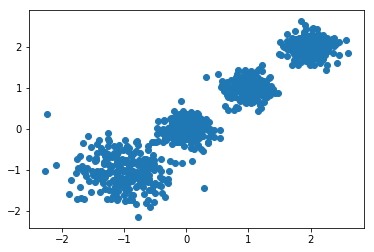

In [10]:
plt.scatter(X[:, 0], X[:,1] ,marker='o' )


In [30]:
y

array([1, 3, 2, 1, 2, 1, 2, 0, 0, 3, 1, 1, 0, 1, 2, 1, 3, 3, 2, 1, 0, 1,
       3, 2, 3, 2, 2, 1, 2, 1, 1, 3, 1, 0, 3, 2, 2, 2, 2, 3, 1, 1, 2, 1,
       1, 0, 2, 1, 2, 0, 3, 1, 2, 3, 1, 1, 0, 3, 0, 2, 3, 0, 2, 0, 2, 1,
       1, 2, 3, 0, 0, 2, 0, 0, 0, 3, 1, 3, 2, 0, 2, 0, 0, 3, 1, 2, 1, 0,
       1, 1, 1, 0, 3, 0, 3, 2, 1, 0, 3, 2, 3, 0, 2, 2, 1, 0, 2, 2, 2, 3,
       3, 2, 0, 1, 0, 3, 1, 3, 0, 3, 3, 1, 3, 3, 2, 2, 1, 3, 1, 2, 3, 1,
       2, 0, 1, 0, 3, 3, 1, 1, 3, 2, 3, 0, 2, 3, 3, 2, 2, 0, 3, 1, 2, 1,
       1, 0, 0, 0, 3, 2, 3, 1, 1, 3, 1, 0, 3, 1, 3, 3, 1, 2, 1, 2, 3, 3,
       2, 0, 3, 0, 1, 1, 1, 3, 2, 3, 0, 3, 2, 3, 0, 2, 2, 1, 0, 2, 0, 3,
       2, 0, 3, 1, 3, 0, 0, 3, 0, 0, 1, 2, 0, 2, 1, 1, 0, 3, 1, 2, 2, 3,
       2, 3, 1, 0, 3, 3, 1, 1, 3, 0, 2, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 1,
       3, 3, 0, 2, 2, 0, 1, 2, 1, 1, 1, 2, 3, 1, 3, 2, 0, 1, 2, 3, 1, 1,
       1, 1, 3, 0, 0, 3, 1, 3, 3, 1, 3, 0, 0, 2, 0, 1, 3, 1, 0, 1, 2, 0,
       1, 0, 0, 0, 0, 3, 2, 2, 0, 3, 0, 0, 0, 2, 0,

## 使用Kmeans进行数据聚类

In [11]:
from sklearn.cluster import KMeans

In [60]:
# 实例化
kmeans = KMeans(n_clusters=2 ,random_state=666 )

In [61]:
# 训练
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=666, tol=0.0001, verbose=0)

In [62]:
# 接收聚类结果
y_pred = kmeans.predict(X)

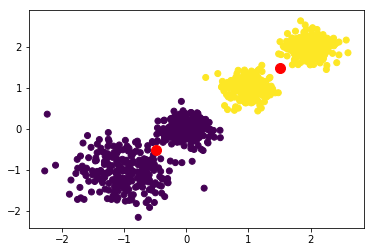

In [63]:
# k=2时的聚类结果
plt.scatter(X[:, 0], X[:,1] ,marker='o' ,c = y_pred)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = 'red',s=100 )
plt.show()

In [29]:
kmeans.cluster_centers_

array([[-0.49326372, -0.51481474],
       [ 1.5007458 ,  1.4889344 ]])

In [64]:
# 导入轮廓系数API
from sklearn.metrics import silhouette_score

In [65]:
# k = 2时  轮廓系数的值
silhouette_score(X, y_pred)

0.642955898185022

In [32]:
# 样本组内距离平方和
kmeans.inertia_

645.6350386101146

### k = 3


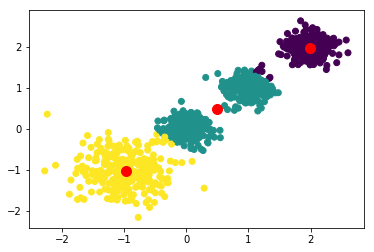

0.5610200496483861

In [66]:
kmeans = KMeans(n_clusters=3, random_state=666)
y_pred = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = 'red',s=100 )
plt.show()
# 样本组内距离平方和
kmeans.inertia_
# k = 2时  轮廓系数的值
silhouette_score(X, y_pred)

### k = 4

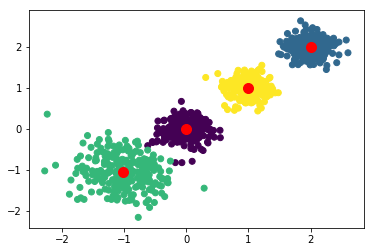

0.6793483930665349

In [67]:
kmeans = KMeans(n_clusters=4, random_state=666)
y_pred = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = 'red',s=100 )
plt.show()
# 样本组内距离平方和
kmeans.inertia_
# k = 2时  轮廓系数的值
silhouette_score(X, y_pred)

### k = 5

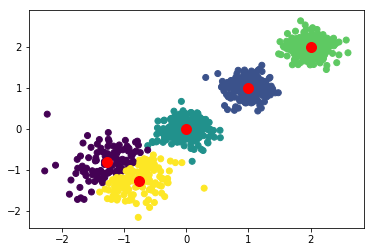

0.6323362556686686

In [68]:
kmeans = KMeans(n_clusters=5, random_state=666)
y_pred = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = 'red',s=100 )
plt.show()
# 样本组内距离平方和
kmeans.inertia_
# k = 2时  轮廓系数的值
silhouette_score(X, y_pred)

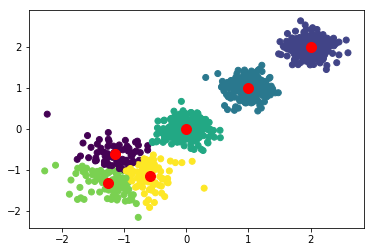

0.6298886682646969

In [69]:
kmeans = KMeans(n_clusters=6, random_state=666)
y_pred = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = 'red',s=100 )
plt.show()
# 样本组内距离平方和
kmeans.inertia_
# k = 2时  轮廓系数的值
silhouette_score(X, y_pred)

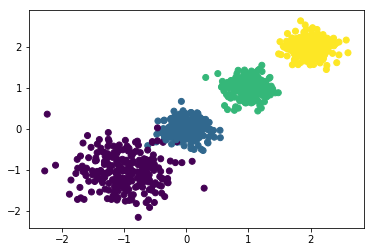

In [28]:
# 生成数据的正确结果
plt.scatter(X[:, 0], X[:,1] ,marker='o' ,c = y)

### 通过学习曲线寻找最优k

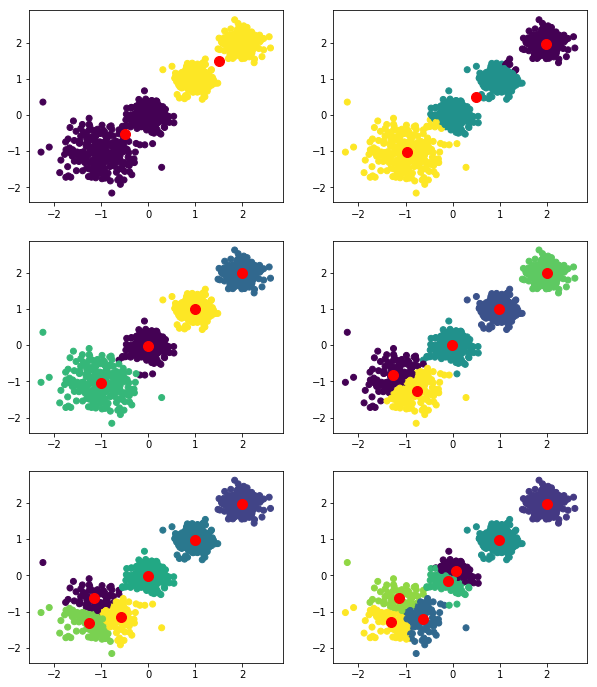

In [75]:
plt.figure(figsize=(10,12))
inertias = [] # 用于接收结果
for i in range(2, 8):# 2 - 7
    
    kmeans = KMeans(n_clusters=i, random_state=666)
    y_pred = kmeans.fit_predict(X)

    # 将6个图绘制到一张画布上来
    plt.subplot(3,2,i-1) # 行 列 第几个  3,2,2
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = 'red',s=100 )
    # 样本组内距离平方和
    inertias.append(kmeans.inertia_)
plt.show()    

Text(0, 0.5, 'inertial')

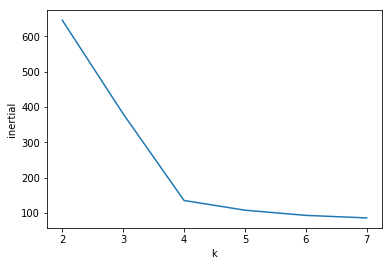

In [59]:
plt.plot(range(2, 8), inertias)
plt.xlabel('k')
plt.ylabel('inertial')

## 将轮廓系数的值绘制到图片上面来

In [85]:
from sklearn import metrics

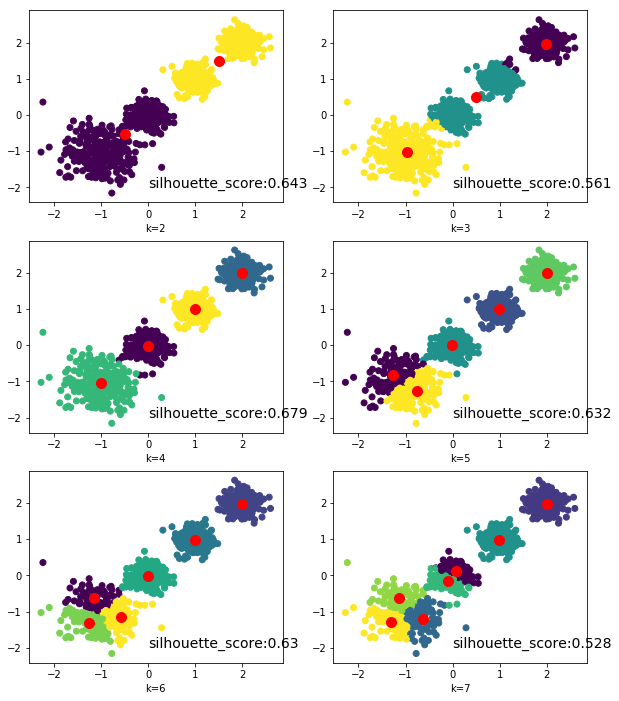

In [82]:
plt.figure(figsize=(10,12))
inertias = [] # 用于接收结果
sil = []
for i in range(2, 8):# 2 - 7
    
    kmeans = KMeans(n_clusters=i, random_state=666)
    y_pred = kmeans.fit_predict(X)

    # 将6个图绘制到一张画布上来
    plt.subplot(3,2,i-1) # 行 列 第几个  3,2,2
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = 'red',s=100 )
    plt.xlabel("k="+str(i))
    
    # 轮廓系数
    s = silhouette_score(X, y_pred)
    sil.append(s)
    # 在图片上面添加文本
    plt.text(0,-2, "silhouette_score:"+str(round(s,3)), size =14)
    # 样本组内距离平方和
    inertias.append(kmeans.inertia_)
plt.show()    

In [83]:
sil

[0.642955898185022,
 0.5610200496483861,
 0.6793483930665349,
 0.6323362556686686,
 0.6298886682646969,
 0.5279944657844706]

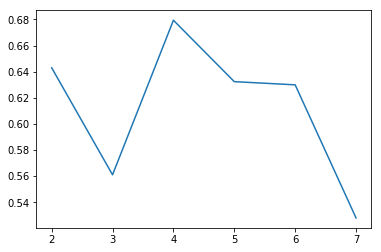

In [84]:
plt.plot(range(2,8), sil)

 Calinski-Harabasz Index对应的方法是metrics.calinski_harabaz_score.
CH指标通过计算类中各点与类中心的距离平方和来度量类内的紧密度，通过计算各类中心点与数据集中心点距离平方和来度量数据集的分离度，CH指标由分离度与紧密度的比值得到。从而，CH越大代表着类自身越紧密，类与类之间越分散，即更优的聚类结果。

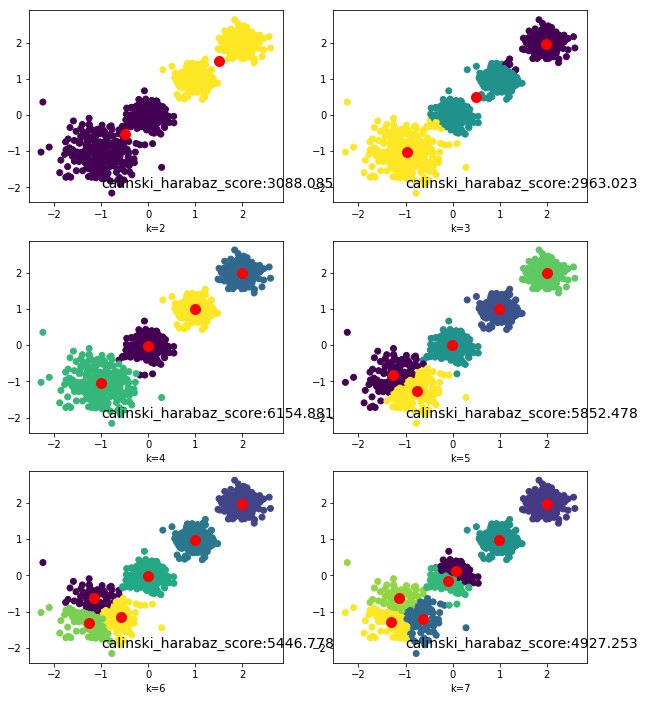

In [87]:
plt.figure(figsize=(10,12))
inertias = [] # 用于接收结果
for i in range(2, 8):# 2 - 7
    
    kmeans = KMeans(n_clusters=i, random_state=666)
    y_pred = kmeans.fit_predict(X)

    # 将6个图绘制到一张画布上来
    plt.subplot(3,2,i-1) # 行 列 第几个  3,2,2
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = 'red',s=100 )
    plt.xlabel("k="+str(i))

    from sklearn import metrics
    c = metrics.calinski_harabaz_score(X, y_pred)  
    # 在图片上面添加文本
    plt.text(-1,-2, "calinski_harabaz_score:"+str(round(c,3)), size =14)
    # 样本组内距离平方和
    inertias.append(kmeans.inertia_)
plt.show()    